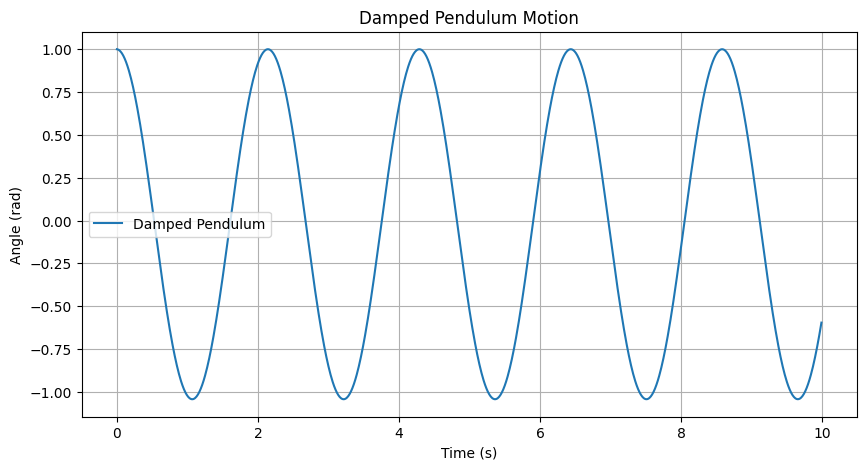

Predicted frequency: 0.4982 Hz


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
A = 1.0          # Initial amplitude (meters)
b = 0.05         # Damping coefficient
m = 1.0          # Mass of bob (kg)
l = 1.0          # Length of pendulum (meters)
g = 9.8          # Gravitational acceleration (m/s^2)
Cd = 0.47        # Drag coefficient (typical for a rectangular block)
rho = 1.225      # Air density (kg/m^3)
cross_sectional_area = 0.1  # Cross-sectional area (m^2)
omega = np.sqrt(g / l)  # Angular velocity (rad/s)

# Time parameters
dt = 0.01        # Time step (seconds)
T = 10.0         # Total time (seconds)

# Initialize arrays for time, position, and velocity
time = np.arange(0, T, dt)
num_steps = len(time)
theta = np.zeros(num_steps)
omega_arr = np.zeros(num_steps)

# Initial conditions
theta[0] = A  # Initial angle (radians)
omega_arr[0] = 0.0  # Initial angular velocity (rad/s)

# Euler's method to solve the differential equations
for i in range(1, num_steps):
    F_drag = 0.5 * rho * (omega_arr[i-1]**2) * Cd * cross_sectional_area
    torque = -m * g * l * np.sin(theta[i-1]) - F_drag * l
    angular_acceleration = torque / (m * l**2)
    omega_arr[i] = omega_arr[i-1] + angular_acceleration * dt
    theta[i] = theta[i-1] + omega_arr[i] * dt

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(time, theta, label='Damped Pendulum')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Damped Pendulum Motion')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the predicted frequency
predicted_frequency = omega / (2 * np.pi)
print(f'Predicted frequency: {predicted_frequency:.4f} Hz')
